### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [1]:
# Project: MovieLens Data Analisys
# By: Rafael A. Sanchez - rasanchezd@gmail.com
# GitHub: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-rasanchezd
# Date: August, 2020

#### 1. Import the necessary packages - 2.5 marks

In [2]:
# Importing required python libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(color_codes=True)
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
# Using pd.read() to load files into datasets
movieRatings = pd.read_csv('Data.csv')
movieInfo = pd.read_csv('item.csv')
movieUsers = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [4]:
# Exploring dataframes and finding missing values.
# movieRatings Dataframe
print('Exploring movieRatings Dataframe')
print('')
print('Shape: ',movieRatings.shape)
print('')
print('Info: ')
print(movieRatings.info())
print('')
print('Describe: ')
print(movieRatings.describe())
print('')
print('Missing Values: ',movieRatings.isnull().values.any())
print(movieRatings.isnull().sum())

Exploring movieRatings Dataframe

Shape:  (100000, 4)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

Describe: 
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.

In [5]:
# movieInfo Dataframe
print('Exploring movieInfo Dataframe')
print('')
print('Shape: ', movieInfo.shape)
print('')
print('Info: ')
print(movieInfo.info())
print('')
print('Describe: ')
print(movieInfo.describe())
print('')
print('Missing Values: ',movieInfo.isnull().values.any())
print(movieInfo.isnull().sum())

Exploring movieInfo Dataframe

Shape:  (1681, 22)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   in

In [6]:
# movieUsers Dataframe
print('Exploring movieUsers Dataframe')
print('')
print('Shape: ', movieUsers.shape)
print('')
print('Info: ')
print(movieUsers.info())
print('')
print('Describe: ')
print(movieUsers.describe())
print('')
print('Missing Values: ',movieUsers.isnull().values.any())
print(movieUsers.isnull().sum())

Exploring movieUsers Dataframe

Shape:  (943, 5)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None

Describe: 
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

Missing Values:  False
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [7]:
# use sum on the default axis
genre = movieInfo.copy().drop(columns=['movie id', 'movie title', 'release date'])
genre.reset_index(inplace=True)
print('Number of Movies per Genre:')
print(genre.sum(axis=0))

Number of Movies per Genre:
index          1412040
unknown              1
Action             251
Adventure          135
Animation           42
Childrens          122
Comedy             505
Crime              109
Documentary         50
Drama              725
Fantasy             22
Film-Noir           24
Horror              92
Musical             56
Mystery             61
Romance            247
Sci-Fi             101
Thriller           251
War                 71
Western             27
dtype: int64


#### 5. Find the movies that have more than one genre - 5 marks

In [8]:
#hint: use sum on the axis = 1
#movieInfo.sum(axis=1)
tmp_multiGenre = movieInfo.copy().drop(columns=['movie id', 'release date'])
tmp_multiGenre['sumGenre'] = tmp_multiGenre.sum(axis=1)
multiGenre = tmp_multiGenre.loc[tmp_multiGenre['sumGenre'] > 1]
multiGenre[['movie title','sumGenre']]

,movie title,sumGenre
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [9]:
print('Dataframe with unknown Genre Movies')
print('Shape: ', movieInfo.shape)
print('')
print(movieInfo.loc[movieInfo['unknown'] == 1])
print('')
movieInfo.drop(movieInfo[movieInfo.unknown == 1].index, inplace = True)
print('Dataframe with unknown Genre Movies removed')
print('Shape: ', movieInfo.shape)
print('')
print(movieInfo.loc[movieInfo['unknown'] == 1])
print('')

Dataframe with unknown Genre Movies
Shape:  (1681, 22)

      movie id    movie title release date  unknown  Action  Adventure  \
1371      1373  Good Morning    4-Feb-1971        1       0          0   

      Animation  Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
1371          0          0       0      0  ...        0          0       0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
1371        0        0        0       0         0    0        0  

[1 rows x 22 columns]

Dataframe with unknown Genre Movies removed
Shape:  (1680, 22)

Empty DataFrame
Columns: [movie id, movie title, release date, unknown, Action, Adventure, Animation, Childrens, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western]
Index: []

[0 rows x 22 columns]



### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

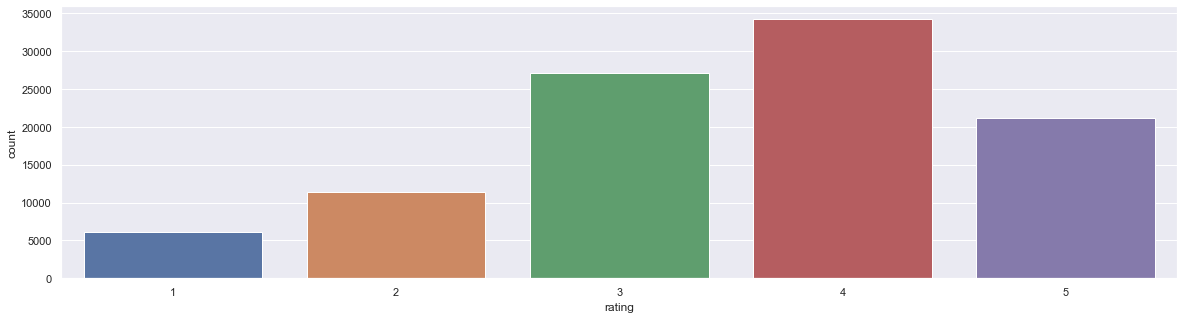

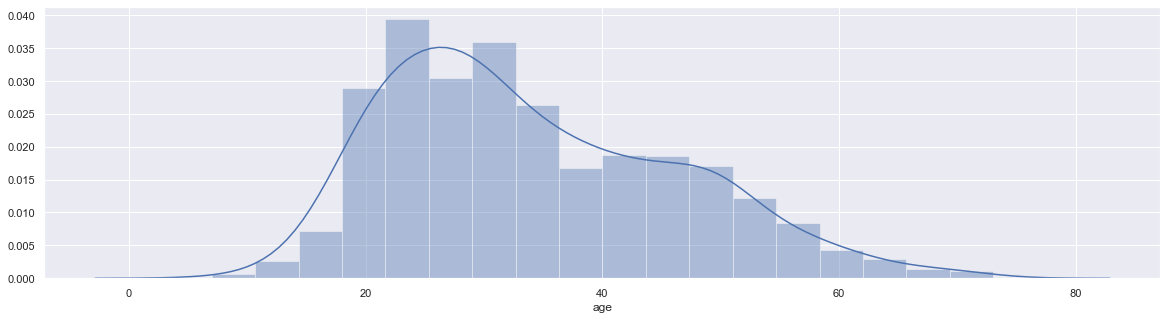

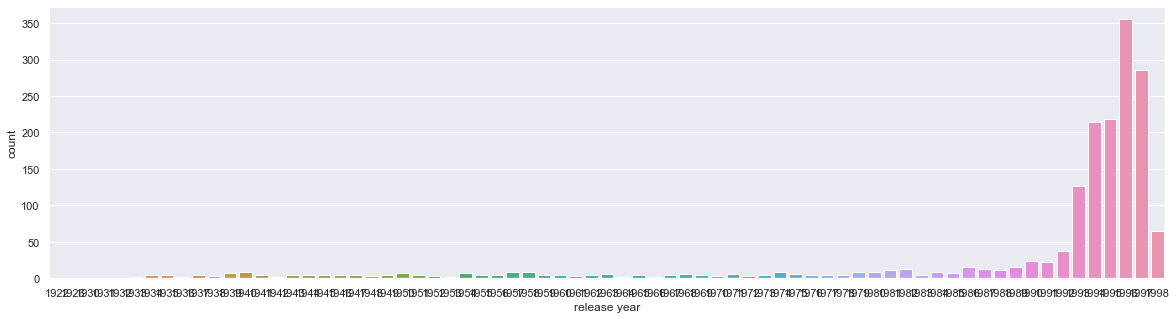

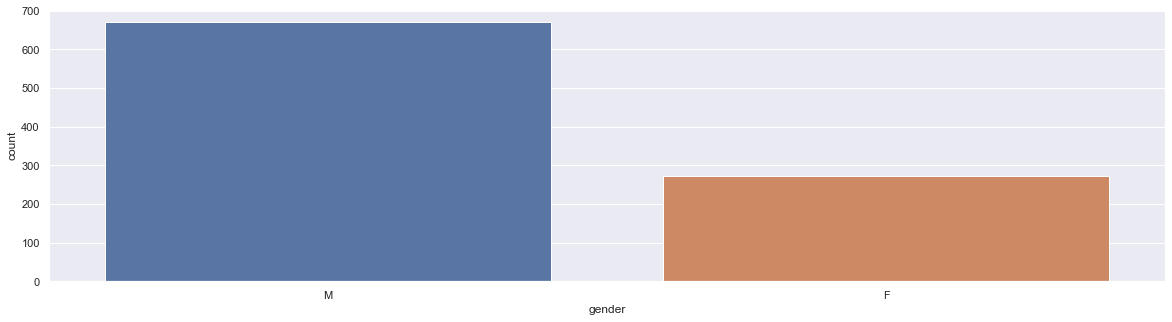

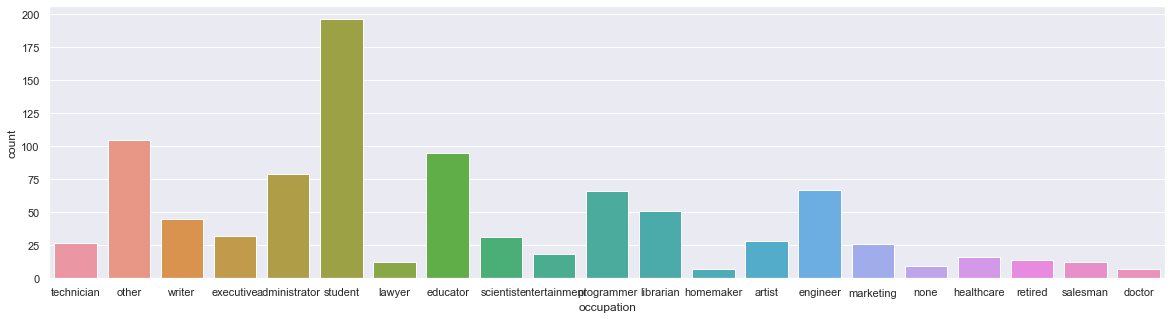

In [10]:
# Extracting year from 'release date' by adding a new pandas datetime column
movieInfo['release year'] = pd.DatetimeIndex(movieInfo['release date']).year

# Ploting variables

# Ratings
plt.figure(figsize=(20,5))
sns.countplot(movieRatings['rating']) 
plt.show() 

# Age
plt.figure(figsize=(20,5))
sns.distplot(movieUsers['age']); 
plt.show()

#Release Year
plt.figure(figsize=(20,5))
sns.countplot(movieInfo['release year']); 
plt.show()

#Gender
plt.figure(figsize=(20,5))
sns.countplot(movieUsers['gender']); 
plt.show()

# Occupation
plt.figure(figsize=(20,5))
sns.countplot(movieUsers['occupation']); 
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

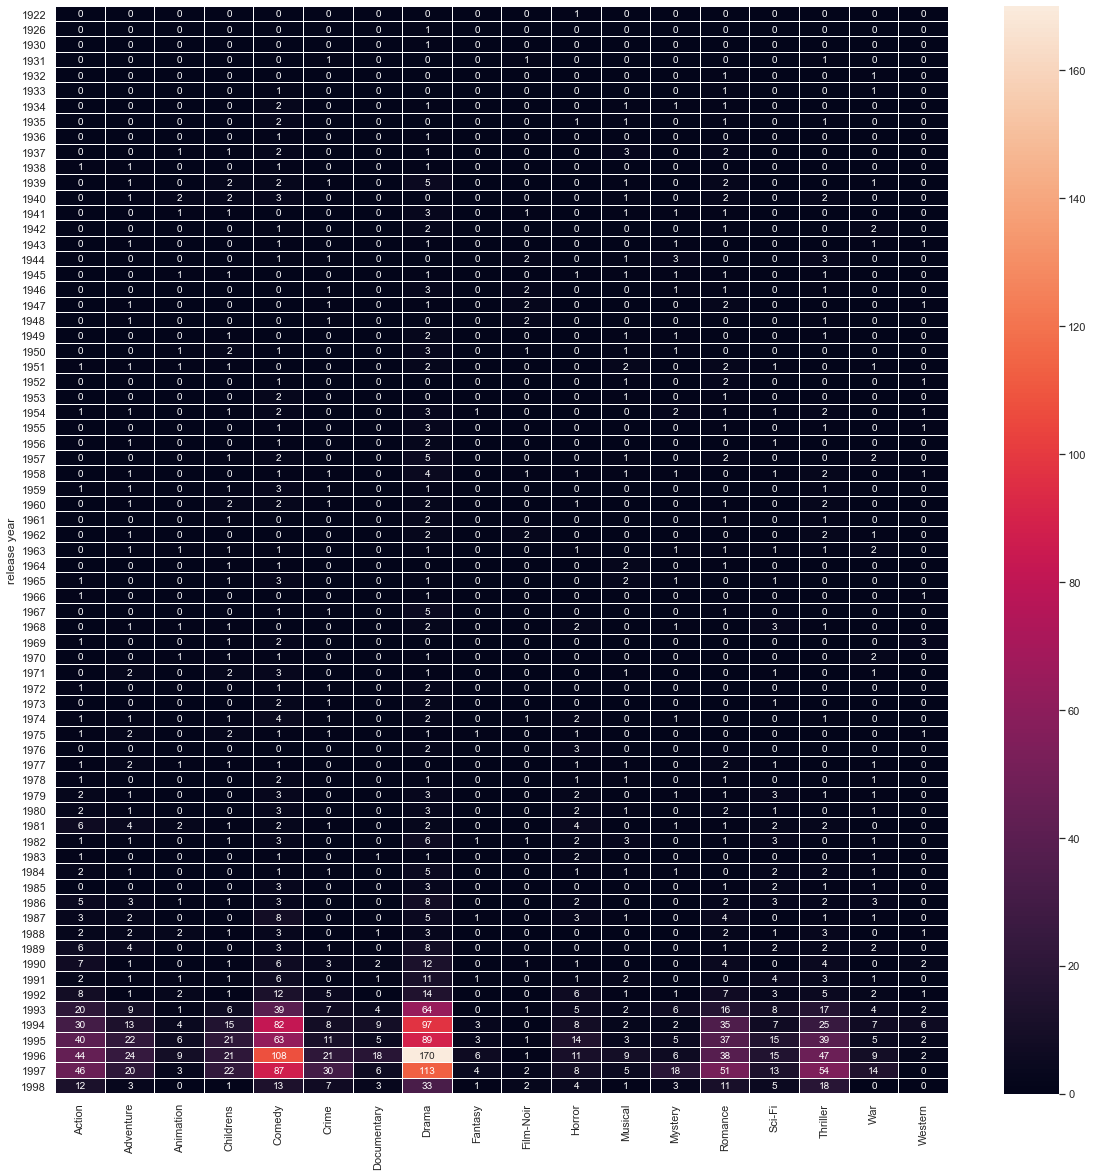

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


In [11]:
# Creting new dataset with Release Year as Index and Genre as colums
movieInfo2 = movieInfo.copy().drop(columns=['movie id', 'movie title', 'unknown'])
groupedYear = movieInfo2.groupby('release year')

# Ploting the data
plt.figure(figsize=(20,20))
sns.heatmap(groupedYear.sum(), annot=True, fmt="d", linewidths=.005)
plt.show()

# Printed just for validation of correct source dataframe
groupedYear.sum()

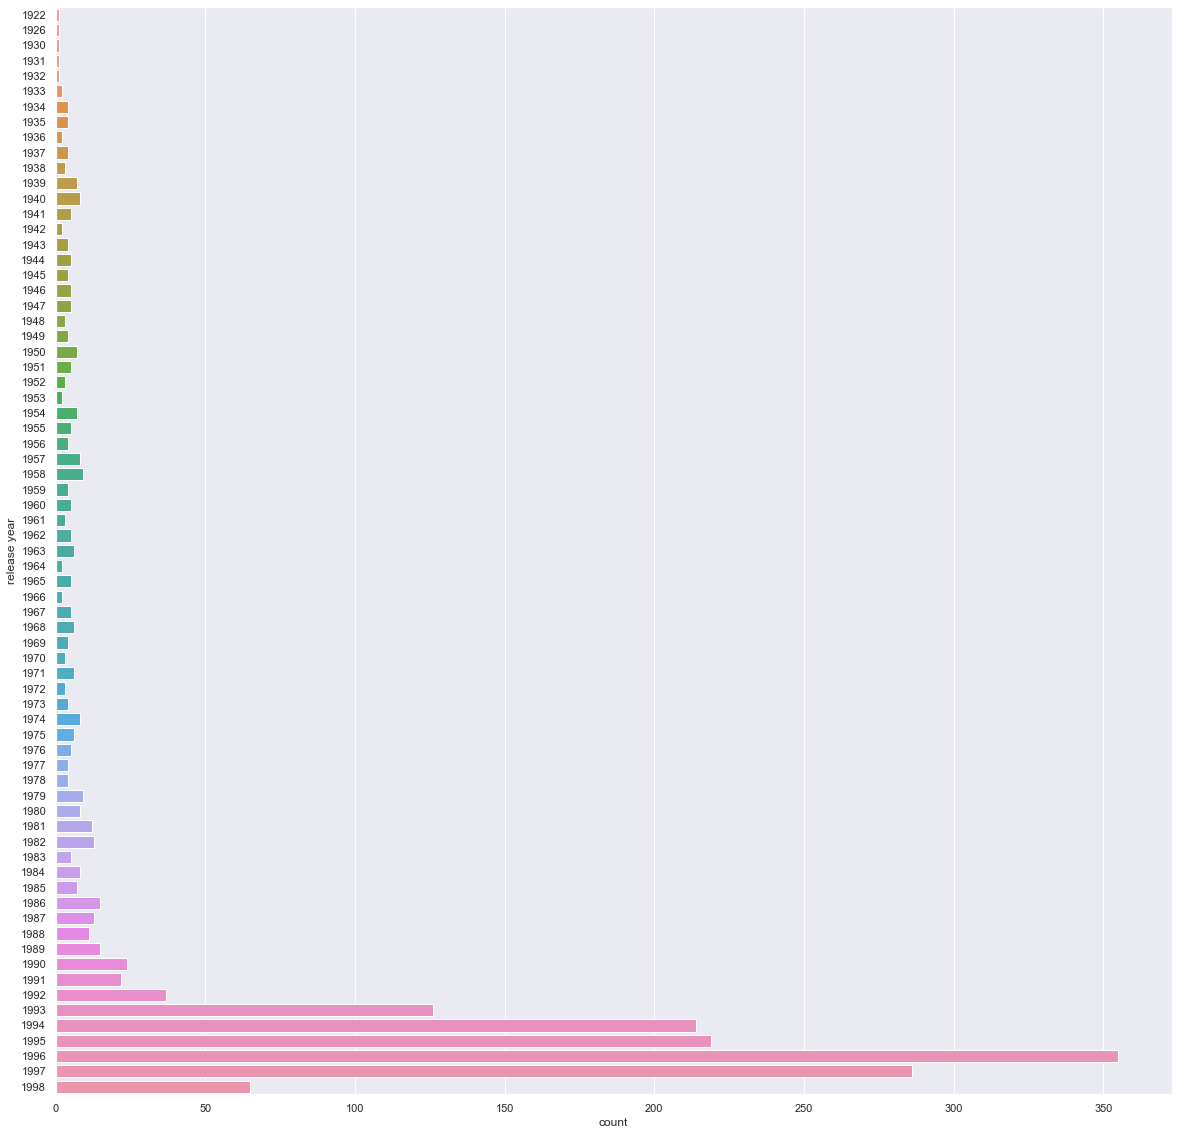

In [12]:
# It seems that the lack of movie releases in the early years make the plot look dark, 
# although it continues to be a real representation of the data
# Here is this chart, again, where we can see that in the early years movies were not releases
# as often ad in the nrecent years

plt.figure(figsize=(20,20))
sns.countplot(y= movieInfo['release year'], data = movieInfo['release year']); 
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. 
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.
4. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [13]:
# From the project's forum Q&A:
# The question is asking for the top 25 movies according to average ratings 
# for those movies where the number of ratings per movie is more than 100.

# Finding t
he average rating of all movies
avgRatings = pd.DataFrame(movieRatings.groupby('movie id')['rating'].mean())

# Finding movies that have more than 100 ratings
ratingCount = pd.DataFrame(movieRatings.groupby('movie id')['rating'].count())
ratingCount2 = ratingCount.loc[ratingCount['rating'] > 100]

# New Dataframe with the top 25 movies that have more than 100 reviews and sorted by average review
topMovies = ratingCount2.join(avgRatings,on='movie id',how='left',lsuffix='s',rsuffix=' average')
topMovies2 = topMovies.sort_values(by=['rating average'],ascending=False).head(25)

# Creating a final dataframe with top 25 movies including titles
topRated = topMovies2.join(movieInfo, on = 'movie id', how = 'left')
topRated2 = topRated[['movie title','ratings','rating average']].sort_values(by=['rating average'],ascending=False)
topRated2


,movie title,ratings,rating average
movie id,,,
408,Kingpin,112,4.491071
318,Paradise Lost: The Child Murders at Robin Hood...,298,4.466443
169,Cinema Paradiso,118,4.466102
483,My Fair Lady,243,4.456790
64,What's Eating Gilbert Grape,283,4.445230
603,Meet Me in St. Louis,209,4.387560
12,Mighty Aphrodite,267,4.385768
50,Legends of the Fall,583,4.358491
178,"Clockwork Orange, A",125,4.344000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [14]:
#write the conclusions here

#Exploring movieUsers Dataframe
#Data columns (total 5 columns):
# #   Column      Non-Null Count  Dtype 
#---  ------      --------------  ----- 
# 0   user id     943 non-null    int64 
# 1   age         943 non-null    int64 
# 2   gender      943 non-null    object
# 3   occupation  943 non-null    object
# 4   zip code    943 non-null    object

#Exploring movieRatings Dataframe
#Data columns (total 4 columns):
# #   Column     Non-Null Count   Dtype
#---  ------     --------------   -----
# 0   user id    100000 non-null  int64
# 1   movie id   100000 non-null  int64
# 2   rating     100000 non-null  int64
# 3   timestamp  100000 non-null  int64

# Creatng a master Dataframe
# Filtering un-needed colums
newMovieInfo = movieInfo.filter(['movie id','Drama','Sci-Fi','Romance'], axis=1)
newMovieRatings = movieRatings.filter(['user id','movie id'], axis=1)
newMovieUsers = movieUsers.filter(['user id','gender'], axis=1)

# Merging all three dataframes into one
newMovieInfo = pd.merge(newMovieRatings,newMovieInfo,how='left',on='movie id')
newMovieInfo2 = pd.merge(newMovieInfo,newMovieUsers,how='left',on='user id')

# Obtaining number of movies rated by gender
dramaGender = pd.DataFrame(newMovieInfo2.groupby('gender')['Drama'].sum())
scifiGender  = pd.DataFrame(newMovieInfo2.groupby('gender')['Sci-Fi'].sum())
romanceGender  = pd.DataFrame(newMovieInfo2.groupby('gender')['Romance'].sum())

merge1 = pd.merge(dramaGender,scifiGender,how='left',on='gender')
ratingsByGender = pd.merge(merge1,romanceGender,how='left',on='gender')

ratingsByGender['% Drama'] = (ratingsByGender['Drama'] / ratingsByGender['Drama'].sum()) * 100
ratingsByGender['% Sci-Fi'] = (ratingsByGender['Sci-Fi'] / ratingsByGender['Sci-Fi'].sum()) * 100
ratingsByGender['% Romance'] = (ratingsByGender['Romance'] / ratingsByGender['Romance'].sum()) * 100

ratingsByGender



,Drama,Sci-Fi,Romance,% Drama,% Sci-Fi,% Romance
gender,,,,,,
F,11008.0,2629.0,5858.0,27.59243,20.652003,30.101228
M,28887.0,10101.0,13603.0,72.40757,79.347997,69.898772
